# Project: Churn prediction for bank customers 


In this project, I will try to find the bank customers who left the bank (closed their account) and who still continue to be a customer.

I have analyzed data publicly available about Churn Modelling and was downloaded from Kaggle, and dataset consists of 10000 rows and 14 columns.


https://www.kaggle.com/shrutimechlearn/churn-modelling

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


### Step 1: Load the Data
####  Business Understanding , Data Understanding , Prepare Data 

#### 1. Business Understanding
- I am going to predict if the customer left the bank (closed his account) or he continues to be a customer.

In [2]:
# Load data.
data=pd.read_csv('C:/Users/Fatim/Desktop/Udactiy/DSND/projects/Data Scientist Capstone-Churn Modelling/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### 2. Data Understanding


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- RowNumber: Row Numbers from 1 to 10000
- CustomerId: Unique Ids for bank customer identification
- Surname: Customer's last name
- CreditScore: Credit score of the customer
- Geography: The country from which the customer belongs
- Gender: Male or Female
- Age: Age of the customer
- Tenure: Number of years for which the customer has been with the bank
- Balance: Bank balance of the customer
- NumOfProducts: Number of bank products the customer is utilising
- HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not
- IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not
- EstimatedSalary: Estimated salary of the customer in Dollars
- ExitedBinary: flag 1 if the customer closed account with bank and 0 if the customer is retained

#### 3. Prepare Data


In [4]:
#make sure coustumer id is unique
data.CustomerId.nunique()

10000

In [5]:
#drop 
data.drop(['RowNumber','Surname'], axis=1, inplace=True)

In [6]:
data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- The data was clean and doesn't have missing values, I have dropped the RowNumber column because the CustomerId column did the same job also I have dropped the Surname column because it will not help me with my analysis.

In [8]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- From the description above you can find that the mean of age is 39 and the max is 92 and the min is 18.
- for the Tenure, the mean is 5 years and the max is 10 and the min is 0 which means less than one year.
- and in the Balance, the mean is 76485 dollar and the max is 250898 dollar and the min is 0 dollar

### Step 2: exploring and visualizing the data


In [9]:
data.Exited.value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

- The customers who closed their accounts were 2037 and who are continues to be customers is 7963  


In [10]:
data_a=data[data['Exited']==1]
data_a.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [11]:
data_b=data[data['Exited']==0]
data_b.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [12]:
def bar_visualize(col,data):
    """
    Description: This function can be used to read data to get a bar chart of specific columns.

    Arguments: 
    col:column name.
    data: dataset. 

  Returns:
    - Data frame contains counting values for the entry column.
    - two bar charts the first one is for the entry column values
      the second is the Exited column aggregate by the entry column.
         """
    x=data[col].value_counts()
    x=pd.DataFrame(x).reset_index()
    x.columns = ['name', 'count']
    x['Percentage']=x['count'] / x['count'].sum()*100

    #plot
    fig, ax =plt.subplots(1,2)
    x.plot(kind='bar',x='name',y='count',ax=ax[0]).set_title(col)
    data.groupby(['Exited',col]).size().unstack().plot(kind='bar',stacked=True,ax=ax[1]).set_title("the customers who closed \n their account aggregate by "+ col)
    fig.show()
    return x

In [13]:
def hist_visualize(col,data,data_a,data_b):
    """
    Description: This function can be used to read data to get a histogram of specific columns.

    Arguments: 
    col:column name.
    data: dataset.
    data_a: dataset of who closed there account.
    data_b: dataset of who continue to be a customer.

    Returns: tow bar charts for the column and th.
         """
    x=data[col].value_counts()
    x=pd.DataFrame(x).reset_index()
    x.columns = ['name', 'count']
    
    #plot
    fig, ax =plt.subplots(1,3)
    data[[col]].plot(kind='hist',rwidth=0.8,ax=ax[0]).set_title(col +' of all\n customers')
    data_a[[col]].plot(kind='hist',rwidth=0.8,ax=ax[1]).set_title(col +' of closed \n their accounts')
    data_b[[col]].plot(kind='hist',rwidth=0.8,ax=ax[2]).set_title(col +' Continuing \n as a customer')
    fig.show()


C:\Users\Fatim\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


,name,count,Percentage
0,France,5014,50.14
1,Germany,2509,25.09
2,Spain,2477,24.77


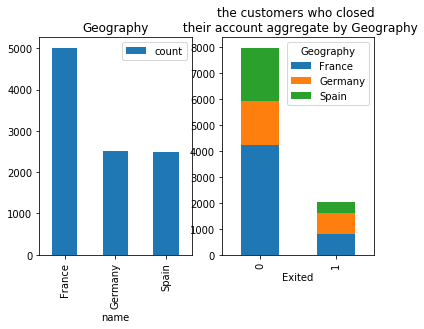

In [14]:
#Most customers was from which country?
bar_visualize('Geography',data)

- Most customers were from France, and the customers who closed their accounts most of them were from France and Germany.

C:\Users\Fatim\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


,name,count,Percentage
0,Male,5457,54.57
1,Female,4543,45.43


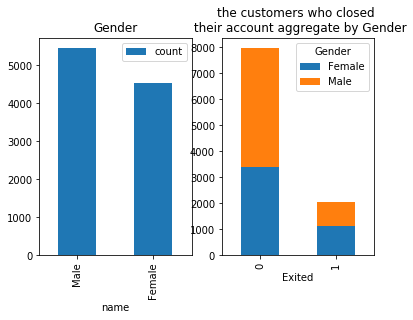

In [15]:
#Most customers were Male or Female?
bar_visualize('Gender',data)

- The male customers are more than female by 18%, and the customers who closed their accounts most of them were Female.

C:\Users\Fatim\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


,name,count,Percentage
0,1,5151,51.51
1,0,4849,48.49


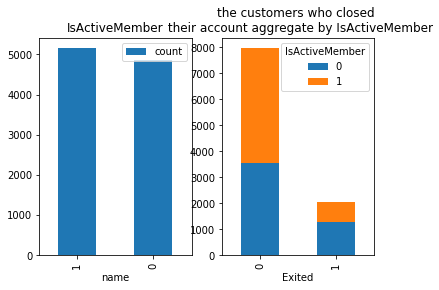

In [16]:
#Most customers were Active Members or not?
bar_visualize('IsActiveMember',data)

- 51.51% of the customers were active and 48.49% not active, and the customers who closed their accounts most of them were not active.

C:\Users\Fatim\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


,name,count,Percentage
0,1,5084,50.84
1,2,4590,45.90
2,3,266,2.66
3,4,60,0.60


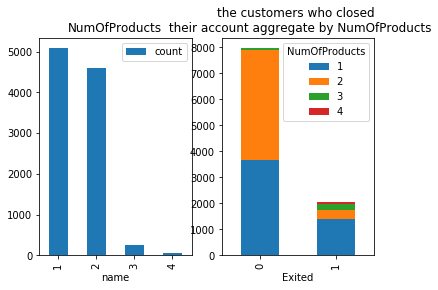

In [17]:
#How many numbers of products with customers?
bar_visualize('NumOfProducts',data)


-Most of the customers have one or two products, and the customers who closed their accounts most of them had one product, also the customers with four products all of them closed their account.


C:\Users\Fatim\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


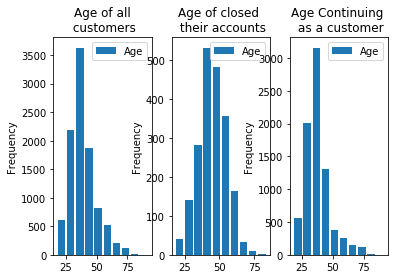

In [18]:
#what are the ages of the bank customers?
hist_visualize('Age',data,data_a,data_b)


- Most of the customers were from 30 to 40 years old


C:\Users\Fatim\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


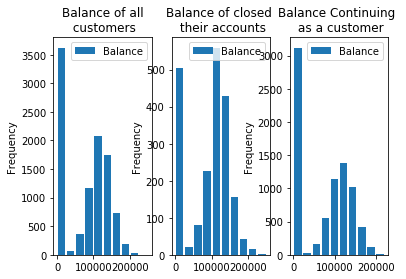

In [19]:
#What is the balance of customers who closed their accounts?
hist_visualize('Balance',data,data_a,data_b)

- Most customers who closed their account were their balance between 100000 dollar to 150000 dollar.


### Step 4: Re-Encode Categorical Features

In [20]:
#convert Gender column Female,male to 0 and 1
data["Gender"]= data["Gender"].astype('category')
data["Gender"]= data["Gender"].cat.codes
data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
#convert Geography column by use one-hot encoding
ohe=pd.get_dummies(data.Geography)
data = data.join(ohe)
data = data.drop('Geography',axis = 1)
data.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### Step 5: Build the model


In [22]:
#define variables(features,Exited)
X=data.loc[:, ~data.columns.isin(['Exited', 'CustomerId'])]
y=data.loc[:, data.columns == 'Exited']

In [23]:
#split the data to two sets. training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [32]:
def build_models(model_name, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    """
    Description: This function can be used build a model and prediction.

    Arguments:
    model_name: the name of machine learning model. 
    X_train: features of train set
    y_train: calss of train set
    X_test: features of test set
    y_test: calss of test set
    Returns:
    return the model information and print the Accuracy of training and testing set
       """
    the_model_name = model_name()
    model = the_model_name.fit(X_train, y_train) 
    predict_test = model.predict(X_test)
    predict_train = model.predict(X_train)
    
    # Compute accuracy on train set using accuracy_score()
    print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, predict_train)))
    #  Compute accuracy on test set using accuracy_score()
    print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predict_test)))
    return model


In [33]:
RandomForest=build_models(RandomForestClassifier)
RandomForest

C:\Users\Fatim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Fatim\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Accuracy score on training data: 0.9859
Accuracy score on testing data: 0.8580


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
GaussianNB=build_models(GaussianNB)
GaussianNB

Accuracy score on training data: 0.7823
Accuracy score on testing data: 0.7937


C:\Users\Fatim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
best_model=RandomForest
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

- for building the models I have used two classification techniques naive Bayes and random forest, also I decide to dropped CustomerId column before build the models because I think it will not help with prediction 

In [36]:
def feature_plot(importances, X_train, y_train):
    """
Description: This function can be used to read train data to get a bar chart of specific columns.

Arguments:
    importances: importint feature. 
    X_train: features
    y_train: calss
Returns:
the bar chart has the important features that help the model to predict

"""
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

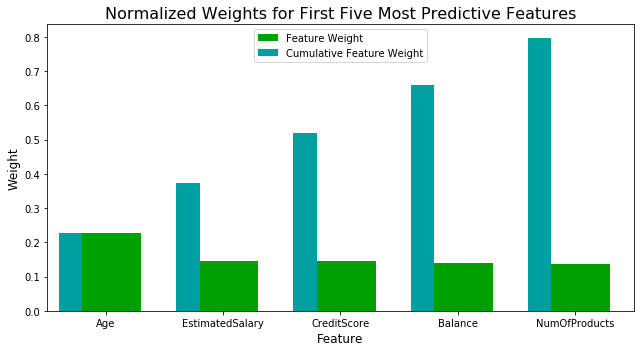

In [37]:
impo=best_model.feature_importances_
feature_plot(impo, X_train, y_train)


- Based on the accuracy I decided to use the random forest model and I think it is better because it can handle data sets with higher dimensionality, and also can identify the most significant variables from thousands of input variables.
Also, I have used feature_importance_ object to determining the first five features that provide the most predictive power and as you can see below the NumOfproduct is the most feature help with predictive after that is balance, and I think maybe there are competitors give a better services and offers to the customers with high balance and have more products.

### Step 6: improving the model



In [40]:

#Create the parameters list you wish to tune, using a dictionary if needed.
parameters = parameters = {'n_estimators' : [700,500], 'max_depth' : [30,20],'min_samples_leaf':[40,30],'min_samples_split':[60,30]}
grid_obj = GridSearchCV(best_model, parameters)

#Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions
best_predictions = best_clf.predict(X_test)

# accuracy
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))

C:\Users\Fatim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Fatim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fatim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fatim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\Fatim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fatim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fatim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fatim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

Final accuracy score on the testing data: 0.8657




- In this project, I tried to analyze and build model predict the bank customers who left the bank (closed their account) and who still continue to be a customer.
First I explored and preparer the data and see what I have to change before starting the analysis. Then I did some exploratory analysis and Visualization on the data. After that, I have built two models and chose the one with the highest accuracy.
From that analysis, I found out that most who closed their accounts were from France and Germany, and I think the bank should focus on marketing in those countries and see if there are competitors and try to provide better services.
 and trying to find why the customers with three and four products closed their accounts.
 
 
- To make the accuracy higher I tried to improve the model by using GridSearchCV and change on different parameters like max_depth and n_estimators so the accuracy I got is 0.8657.
It hasn't improved much and maybe that because the random forest is slow learning, also having more data is always good to improve the model results.